In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/raw/all_stocks_5yr.csv')

In [3]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<AxesSubplot:>

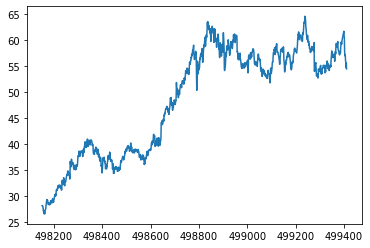

In [4]:
sbux['close'].plot()

In [5]:
sbux['prev_close'] = sbux['close'].shift(1)

In [6]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [7]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

In [8]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [11]:
sbux['return2'] = sbux['close'].pct_change(1)

In [12]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


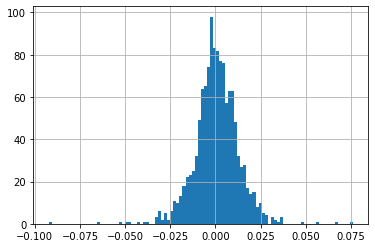

In [13]:
sbux['return'].hist(bins=100);

In [14]:
sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133882)

In [15]:
sbux['log_return'] = np.log(sbux['return']+1)

In [16]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


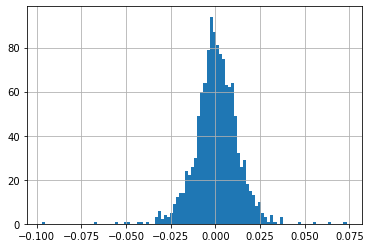

In [17]:
sbux['log_return'].hist(bins=100);

In [18]:
sbux['log_return'].mean(), sbux['log_return'].std()

(0.000523590274810868, 0.012381234216101253)

Normal Distribution - QQ-Plots

In [19]:
from scipy.stats import norm

In [20]:
x_list = np.linspace(
sbux['return'].min(),
sbux['return'].max(),
100)

In [21]:
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

<AxesSubplot:>

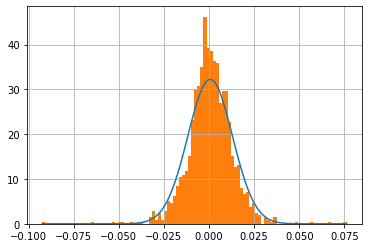

In [22]:
plt.plot(x_list, y_list);
sbux[ 'return'].hist(bins=100, density=True)

In [23]:
from scipy.stats import probplot

((array([-3.26318411, -3.00291115, -2.85798028, ...,  2.85798028,
          3.00291115,  3.26318411]),
  array([-0.09243697, -0.06519128, -0.05321627, ...,  0.05617538,
          0.06623157,  0.0761332 ])),
 (0.012069021175478525, 0.0006002332205830934, 0.9745536080830226))

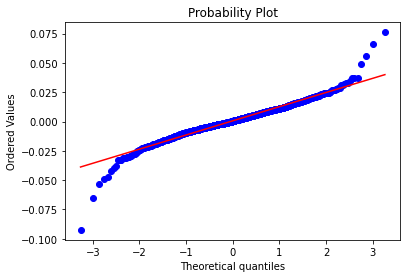

In [24]:
probplot(sbux[ 'return'].dropna(), dist='norm', fit=True, plot=plt)

In [25]:
import statsmodels.api as sm

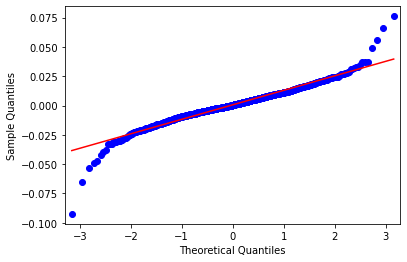

In [26]:
sm.qqplot(sbux['return'].dropna(), line='s');

In [27]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [28]:
y_list = norm.pdf(x_list, loc=sbux['log_return'].mean(), scale=sbux['log_return'].std())

<AxesSubplot:>

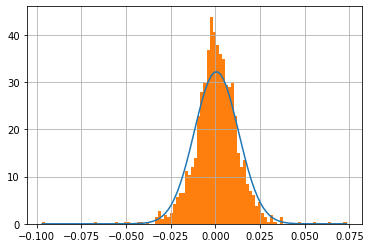

In [29]:
plt.plot(x_list, y_list);
sbux[ 'log_return'].hist(bins=100, density=True)

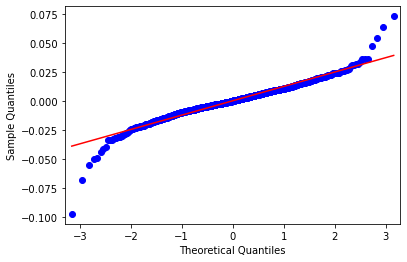

In [30]:
sm.qqplot(sbux['log_return'].dropna(), line='s');